#### import libraries

In [87]:
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , root_mean_squared_error
import matplotlib.pyplot as plt

#### Load data

In [88]:
data = pd.read_csv('paris_airbnb.csv')
data.iloc[[0],:]

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,city,zipcode,state,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews
0,100%,NaN,1.0,48.83349,2.31852,Paris,75014,Île-de-France,2,Entire home/apt,0.0,1.0,0.0,$75.00,$50.00,$0.00,3,15,8


In [89]:
data.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'latitude', 'longitude', 'city', 'zipcode', 'state', 'accommodates',
       'room_type', 'bedrooms', 'bathrooms', 'beds', 'price', 'cleaning_fee',
       'security_deposit', 'minimum_nights', 'maximum_nights',
       'number_of_reviews'],
      dtype='object')

#### data preprocessing

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    5000 non-null   object 
 1   host_acceptance_rate  0 non-null      float64
 2   host_listings_count   7999 non-null   float64
 3   latitude              8000 non-null   float64
 4   longitude             8000 non-null   float64
 5   city                  7997 non-null   object 
 6   zipcode               7930 non-null   object 
 7   state                 7977 non-null   object 
 8   accommodates          8000 non-null   int64  
 9   room_type             8000 non-null   object 
 10  bedrooms              7976 non-null   float64
 11  bathrooms             7942 non-null   float64
 12  beds                  7986 non-null   float64
 13  price                 8000 non-null   object 
 14  cleaning_fee          6250 non-null   object 
 15  security_deposit     

In [91]:
# Remove categorical columns and drop null values
drop_cols = ["host_response_rate","host_acceptance_rate","city","zipcode", "state","room_type","cleaning_fee","security_deposit"]

data = data.drop(drop_cols,axis=1)

data =data.dropna(axis=0)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7916 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   host_listings_count  7916 non-null   float64
 1   latitude             7916 non-null   float64
 2   longitude            7916 non-null   float64
 3   accommodates         7916 non-null   int64  
 4   bedrooms             7916 non-null   float64
 5   bathrooms            7916 non-null   float64
 6   beds                 7916 non-null   float64
 7   price                7916 non-null   object 
 8   minimum_nights       7916 non-null   int64  
 9   maximum_nights       7916 non-null   int64  
 10  number_of_reviews    7916 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 742.1+ KB


In [92]:
data['price'].head()

0     $75.00
1    $115.00
2    $115.00
3     $90.00
4     $75.00
Name: price, dtype: object

In [93]:
data['price'] = data['price'].str.replace('$','').str.replace(',','').astype(float)
data['price'].head()

0     75.0
1    115.0
2    115.0
3     90.0
4     75.0
Name: price, dtype: float64

In [94]:
# Extract correlation between 'price' and other columns
correlations = data.corr()['price'].drop('price')

correlations

host_listings_count    0.077847
latitude              -0.067610
longitude             -0.135705
accommodates           0.450208
bedrooms               0.437525
bathrooms              0.405662
beds                   0.402799
minimum_nights         0.006719
maximum_nights         0.009873
number_of_reviews     -0.018369
Name: price, dtype: float64

In [95]:
# Extract train cols 
train_cols = ["accommodates","bedrooms","bathrooms","beds"]

features = data[train_cols]
target = data['price']

X_train , X_test , y_train , y_test = train_test_split(features,target,test_size=0.2,random_state=42)


In [ ]:
# Run KNN with a randomly chosen k (number of neighbors)
knn = KNeighborsRegressor(algorithm="brute",n_neighbors=5)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
mse = mean_squared_error(predictions,y_test)
rmse = root_mean_squared_error(predictions,y_test)

print(mse,rmse)

6804.707626262627 82.49065175074462


In [97]:
# Run KNN with different k values to find the most useful k
k_values = range(3, 21)  
mse_values = []  

for k in k_values :
    knn = KNeighborsRegressor(algorithm="brute",n_neighbors=k)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    mse = mean_squared_error(predictions,y_test)
    
    mse_values.append(mse)

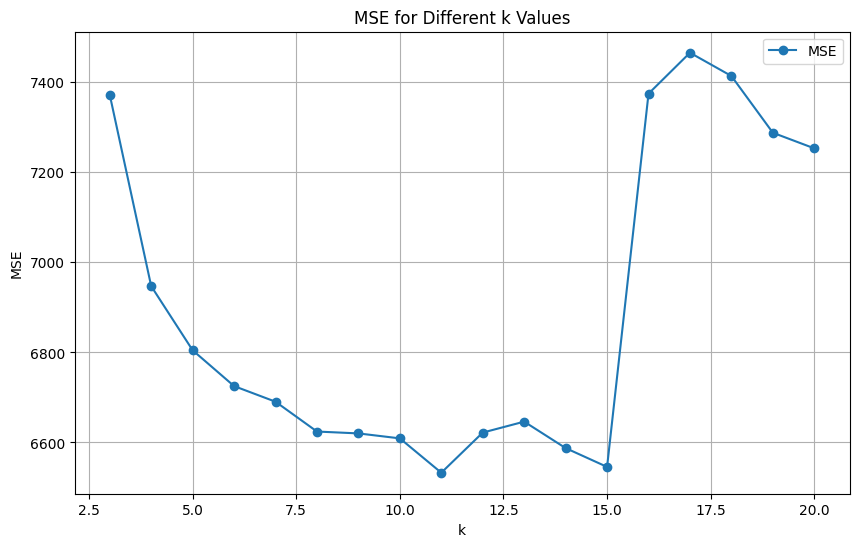

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', label='MSE')
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('MSE for Different k Values')
plt.legend()
plt.grid()
plt.show()

- Based on the analysis, k = 11 is the best value for our KNN model.